# Algoritmo KNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sofa_sem import bit_error_rate

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)

### Preparación de los datos

In [3]:
# Crear un conjunto de datos de entrenamiento con 100 elementos
X = np.random.rand(1000, 2) * 10
y = (X[:, 0] + X[:, 1] > 10).astype(int)

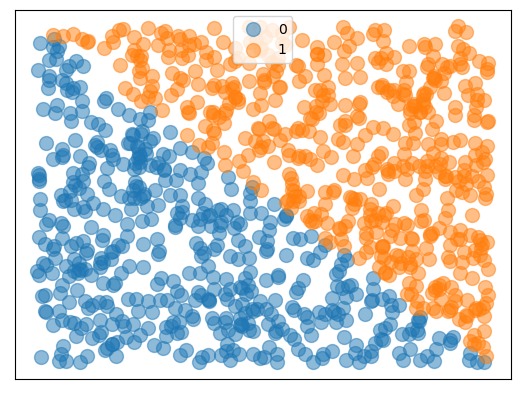

In [4]:
# Grafica de los datos de entrada
for g in np.unique(y):
    ix = np.where(y == g)
    plt.scatter(X[ix, 0], X[ix, 1], label=g, s=100, marker='o', alpha=0.5)
plt.xticks(())
plt.yticks(())
plt.legend(loc=9)
plt.show()

### Elección del mejor K

In [5]:
k = [1, 3, 5, 7, 9, 11, 13, 15]
ber_knn = []
for j in k:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

    model = KNeighborsClassifier(n_neighbors=j)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    ber, error = bit_error_rate(y_test, y_pred)
    ber_knn.append(ber)

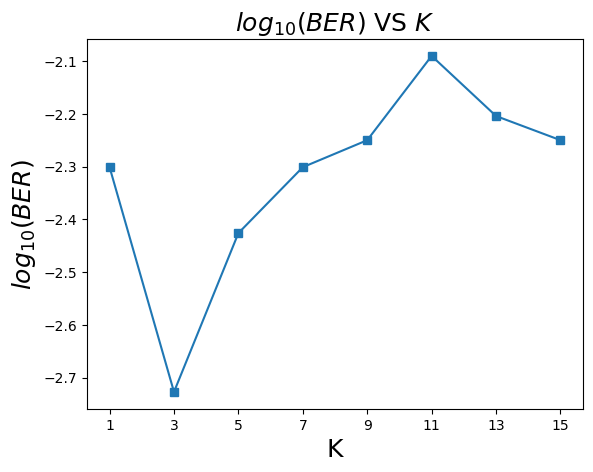

In [6]:
plt.plot(k, np.log10(ber_knn), marker='s')
plt.title('$log_{10}(BER)$ VS $K$', fontsize=18)
plt.xticks(k)
plt.xlabel('K', fontsize=18)
plt.ylabel('$log_{10}(BER)$', fontsize=18)
plt.show()

El mejor K es 3 para estos datos con una trama de entrenamiento del 60% de los datos totales.

### Aplicación del modelo KNN

In [7]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [8]:
# Instanciar el modelo k-NN
model = KNeighborsClassifier(n_neighbors=3)

In [9]:
# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
model.score(X_train, y_train)

0.9916666666666667

In [11]:
# Calcular la precisión del modelo en los datos de prueba
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.975


### Añadiendo un nuevo valor para predecir

In [12]:
# Se generan los nuevos datos a predecir
datos = np.array([[9., 5.], [3., 3.], [5., 5.]])

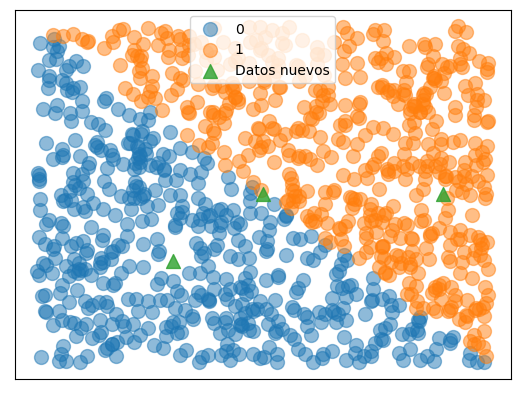

In [13]:
# Se grafica con el nuevo dato
for g in np.unique(y):
    ix = np.where(y == g)
    plt.scatter(X[ix, 0], X[ix, 1], label=g, s=100, marker='o', alpha=0.5)
plt.scatter(datos[:, 0], datos[:, 1], label='Datos nuevos', s=100, marker='^', alpha=0.8)
plt.xticks(())
plt.yticks(())
plt.legend(loc=9)
plt.show()

In [14]:
# Calcular clase a la que pertenecen los datos
print("Clase:", model.predict(datos))

Clase: [1 0 0]


In [15]:
# Calcular probabilidad de clase a la que pertenecen los datos
print("Probabilidades por clase:", model.predict_proba(datos))

Probabilidades por clase: [[0. 1.]
 [1. 0.]
 [1. 0.]]
